In [40]:
import pandas as pd
import psycopg2

from datetime import datetime, date

In [19]:
conn = psycopg2.connect(database='hackathon2020_dev', user="postgres", password="Allo123!", host="127.0.0.1", port="5432")

df_per_state = pd.read_sql_query("SELECT * FROM public.state_temperatures",con=conn,index_col=['id'])
df_per_country = pd.read_sql_query("SELECT * FROM public.country_temperatures",con=conn,index_col=['id'])
df_tweet_statistics = pd.read_sql_query('SELECT * FROM public.trump_tweets_daily_stats',con=conn,index_col=['id'])

df_per_country = df_per_country[df_per_country['averageTemperature'] != 'Nan']
df_usa = df_per_country[df_per_country['country'] == 'United States']

In [20]:
df_tweet_statistics.head()

,date,average_impact_level,tweet_count,created_at,updated_at,spx_open,spx_close,spx_high,spx_low
id,,,,,,,,,
77,2013-07-27,35.0,3,2021-12-21 08:07:15.710849,2021-12-21 08:07:15.710849,NaN,NaN,0.00,0.00
3,2013-06-05,35.0,29,2021-12-21 08:07:15.710849,2021-12-21 08:07:15.710849,48.19,47.51,1629.31,1607.09
9,2013-06-11,35.0,18,2021-12-21 08:07:15.710849,2021-12-21 08:07:15.710849,48.47,48.02,1640.13,1622.92
10,2013-06-15,35.0,12,2021-12-21 08:07:15.710849,2021-12-21 08:07:15.710849,NaN,NaN,0.00,0.00
11,2013-06-12,35.0,29,2021-12-21 08:07:15.710849,2021-12-21 08:07:15.710849,48.22,47.62,1637.71,1610.92


<AxesSubplot:xlabel='date'>

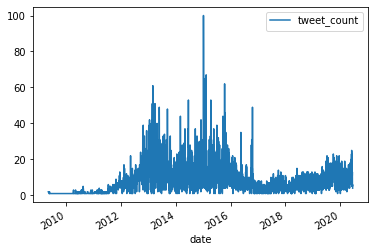

In [21]:
df_tweet_statistics.plot(x='date', y='tweet_count')

In [51]:
df_us_state = df_per_state[df_per_state['country'] == 'United States']
df_us_state = df_per_state[df_per_state['state'] == 'California']
df_us_state.head()

,recordedAt,averageTemperature,averageTemperatureUncertainty,state,country,created_at,updated_at
id,,,,,,,
433887,1849-01-01,5.59,2.40,California,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
433888,1849-02-01,6.94,2.04,California,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
433889,1849-03-01,9.73,2.29,California,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
433890,1849-04-01,12.29,2.86,California,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
433891,1849-05-01,14.42,2.21,California,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241


In [53]:
df_us_state_recent = df_us_state.loc[df_us_state['recordedAt'] > date(2010, 1, 1)]

<AxesSubplot:xlabel='recordedAt'>

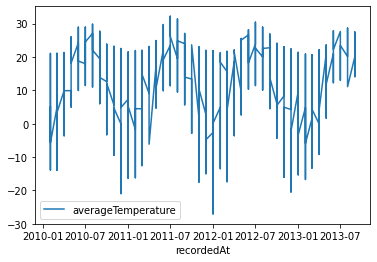

In [42]:
df_us_state_recent.plot(x='recordedAt', y='averageTemperature')